In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')

In [3]:
dataFirst = pd.read_csv('/Users/fokin/Downloads/StudentsPerformance.csv') 
font = {'size': 4.5}
plt.rc('font', **font)

## Образование родителей и тип завтрака у детей (Алимурадова) 

In [4]:
typeoflunch = dataFirst.groupby(["parental level of education", "lunch"])["test preparation course"].count()
typeoflunch

parental level of education  lunch       
associate's degree           free/reduced     77
                             standard        145
bachelor's degree            free/reduced     44
                             standard         74
high school                  free/reduced     70
                             standard        126
master's degree              free/reduced     24
                             standard         35
some college                 free/reduced     79
                             standard        147
some high school             free/reduced     61
                             standard        118
Name: test preparation course, dtype: int64

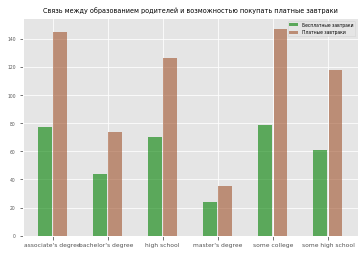

In [5]:
for_x_tik = []
for i in range(0, len(typeoflunch)-1, 2):
    plt.bar(i, typeoflunch[i], 0.5, color='g', alpha=0.6, label='Бесплатные завтраки')
    plt.bar(i + 0.55,  typeoflunch[i + 1], 0.5, color='#A0522D', alpha=0.6, label='Платные завтраки')
    if i == 0:
        plt.legend()
    for_x_tik += [(i + i + 0.55)/2]
xlabels = ["associate's degree", "bachelor's degree  ", "high school", 
           "master's degree", "some college", "some high school"]
plt.xticks(for_x_tik, xlabels, size=6)
plt.title('Связь между образованием родителей и возможностью покупать платные завтраки')
plt.show()

"Право на получение бесплатного завтрака есть у ребенка из семьи, состоящей из четырех человек и если годовой доход семьи составляет $26 000 или менее". 
**ВЫВОД:** Можно предположить, что родители, получившие masters degree позже остальных вышли на рынок труда, поэтому их заработок меньше, чем у остальных, а следовательно, у детей есть возможность питаться бесплатно.  

## Средняя оценка по трем экзаменам (Алимурадова)

In [6]:
score_value = dataFirst[['parental level of education', 'lunch', 'math score', 'reading score', 'writing score']]
score_value['mean score'] = list(pd.Series((score_value['math score'] +
                                            score_value['reading score']+score_value['writing score'])/3))
score_value

,parental level of education,lunch,math score,reading score,writing score,mean score
0,bachelor's degree,standard,72,72,74,72.666667
1,some college,standard,69,90,88,82.333333
2,master's degree,standard,90,95,93,92.666667
3,associate's degree,free/reduced,47,57,44,49.333333
4,some college,standard,76,78,75,76.333333
...,...,...,...,...,...,...
995,master's degree,standard,88,99,95,94.000000
996,high school,free/reduced,62,55,55,57.333333
997,high school,free/reduced,59,71,65,65.000000
998,some college,standard,68,78,77,74.333333


## Образование родителей и средний балл за экзамен (Харитонова)

In [7]:
score_bacalavr = (score_value['mean score'][score_value['parental level of education'] == "bachelor's degree"])
score_associate = (score_value['mean score'][score_value['parental level of education'] == "associate's degree"])
score_hsch = (score_value['mean score'][score_value['parental level of education'] == "high school"])
score_master = (score_value['mean score'][score_value['parental level of education'] == "master's degree"])
score_college = (score_value['mean score'][score_value['parental level of education'] == "some college"])
score_sch = (score_value['mean score'][score_value['parental level of education'] == "some high school"])

#### Зависимость между образованием родителей и средним баллом детей

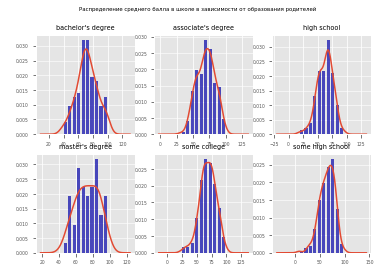

In [8]:
def plt2typeeducation(s, i, score, tytle):
    y = s.add_subplot(2, 3, i)
    y.hist(score, color='#0504aa', alpha=0.7, rwidth=0.7, density=True)
    score_bacalavrhistkde = pd.Series(score)
    score_bacalavrhistkde.plot.kde()
    y.set(title=tytle, xlabel='', ylabel=' ')
    y.grid(axis='y', alpha=0.75)

score_typeeducation = plt.figure()
plt2typeeducation(score_typeeducation, 1, score_bacalavr, "bachelor's degree")
plt2typeeducation(score_typeeducation, 2, score_associate, "associate's degree")
plt2typeeducation(score_typeeducation, 3, score_hsch, "high school")
plt2typeeducation(score_typeeducation, 4, score_master, "master's degree")
plt2typeeducation(score_typeeducation, 5, score_college, "some college")
plt2typeeducation(score_typeeducation, 6, score_sch, "some high school")


score_typeeducation.suptitle('Распределение среднего балла в школе в зависимости от образования родителей')
plt.show()


**ВЫВОД:** Лучший средний балл у детей, чьи родители получили master's degree.

## Зависимость между предметами и средним баллом (Харитонова) 

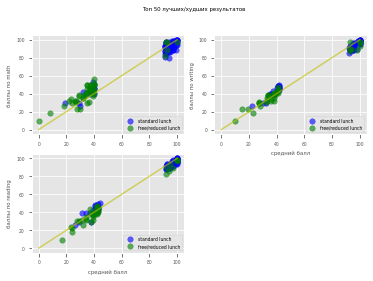

In [9]:
def correlaziabysub(s, data1, positiaplot, sub, i):
    data1 = data1.sort_values(by=sub, ascending=False)
    grafscore1 = s.add_subplot(2, 2, positiaplot)
    grafscore1.scatter(data1[sub][0:50][data1['lunch'] == 'standard'],
                       data1['mean score'][0:50][data1['lunch'] == 'standard'],
                       color='b', label='standard lunch', alpha=0.6, s=30)
    grafscore1.scatter(data1[sub][0:50][data1['lunch'] == 'free/reduced'],
                       data1['mean score'][0:50][data1['lunch'] == 'free/reduced'],
                       color='g', label='free/reduced lunch', alpha=0.6, s=30)
    grafscore1.scatter(data1[sub][-50:][data1['lunch'] == 'standard'],
                       data1['mean score'][-50:][data1['lunch'] == 'standard'],
                       color='b', alpha=0.6, s=30)
    grafscore1.scatter(data1[sub][-50:][data1['lunch'] == 'free/reduced'],
                       data1['mean score'][-50:][data1['lunch'] == 'free/reduced'],
                       color='g', alpha=0.6, s=30)
    grafscore1.plot([0, 100], [0, 100], color='y', alpha=0.6)
    grafscore1.legend(loc="lower right")
    if positiaplot == 1:
        grafscore1.set(  ylabel='баллы по '+i)
    else:
        grafscore1.set(xlabel='средний балл', ylabel='баллы по '+i)

pltscore1 = plt.figure()
correlaziabysub(pltscore1, score_value, 1, 'math score', 'math')
correlaziabysub(pltscore1, score_value, 2, 'writing score', 'writing')
correlaziabysub(pltscore1, score_value, 3, 'reading score', 'reading')
pltscore1.suptitle('Топ 50 лучших/худших результатов')
plt.show()

 Если ученик учится плохо, то его балл по математике скорее всего будет выше среднего по трем предметами, если он учится хорошо, то наблюдается обратная ситуация. Баллы по reading и writing соответсвуют среднему по трем предметам. Кроме этого, среди топ-50 лучших больше тех, кто платит за завтрак, а среди топ-50 худших больше тех, кто получает бесплатный завтрак. 

## Влияние подготовительных курсов на дальнейший средний балл (Харитонова) 

In [10]:
data2 = {'average score': ((dataFirst['reading score']+dataFirst['writing score']+dataFirst['math score'])/3).tolist(),
         'test preparation course': (dataFirst['test preparation course'].replace(['none', 'completed'],
                                                                                  [0, 1])).tolist()
         }
pddata2 = pd.DataFrame(data2)
pddata2

,average score,test preparation course
0,72.666667,0
1,82.333333,1
2,92.666667,0
3,49.333333,0
4,76.333333,0
...,...,...
995,94.000000,1
996,57.333333,0
997,65.000000,1
998,74.333333,1


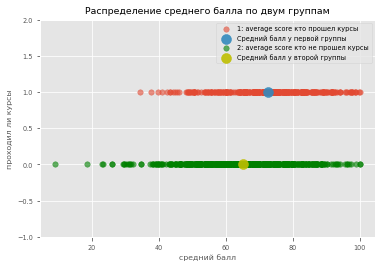

In [11]:
font = {'size': 6.5}
plt.rc('font', **font)
plt3 = plt.figure()
plt3n = plt3.add_subplot(1, 1, 1)
plt3n.scatter(pddata2['average score'][pddata2['test preparation course'] == 1],
              pddata2['test preparation course'][pddata2['test preparation course'] == 1], alpha=0.6, s=30,
              label='1: average score кто прошел курсы')
plt3n.scatter(pddata2['average score'][pddata2['test preparation course'] == 1].mean(), 1, alpha=0.9, s=100,
              label='Cредний балл у первой группы')

plt3n.scatter(pddata2['average score'][pddata2['test preparation course'] == 0],
              pddata2['test preparation course'][pddata2['test preparation course'] == 0], alpha=0.6, s=30,
              color='g', label='2: average score кто не прошел курсы')
plt3n.scatter(pddata2['average score'][pddata2['test preparation course'] == 0].mean(), 0,
              color='y', alpha=0.9, s=100, label='Cредний балл у второй группы')
plt3n.set(title="Распределение среднего балла по двум группам", xlabel='средний балл', ylabel='проходил ли курсы')
plt.ylim(-1, 2)
plt.legend()
plt.show()

**ВЫВОД:** Если ребенок проходил подготовительные курсы, то представители данной группы более богатые. Следовательно, можно сделать вывод, что более высокий средний балл по предметам связан с финансовой обеспеченностью.

## Выделение расы с лучшей успеваемостью (Харитонова)

In [12]:
dataFirst = pd.read_csv('/Users/fokin/Downloads/StudentsPerformance.csv')
dataFirst1 = pd.DataFrame(dataFirst.sort_values(by='test preparation course'), copy=False)
dataFirst1['test preparation course'] = dataFirst1['test preparation course'].replace(['none', 'completed'], [0, 1])
dataFirst1['lunch'] = dataFirst1['lunch'].replace(['standard', 'free/reduced'], [1, 0])
dataFirst1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
302,female,group C,associate's degree,1,1,67,84,81
757,male,group E,bachelor's degree,0,1,70,68,72
758,female,group D,some college,0,1,52,59,65
759,male,group B,some college,1,1,69,77,77
366,male,group C,high school,1,1,69,58,53
...,...,...,...,...,...,...,...,...
402,female,group A,some college,0,0,49,65,55
404,female,group C,high school,1,0,54,59,62
405,female,group C,some high school,1,0,63,73,68
412,male,group D,associate's degree,1,0,71,66,60


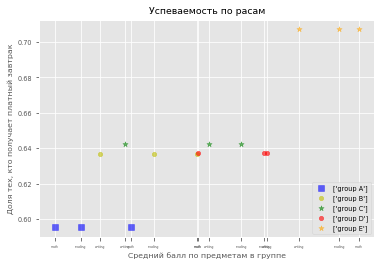

In [14]:
databyrace = dataFirst1.groupby('race/ethnicity').mean()

plt4 = plt.figure()
plt4n = plt4.add_subplot(1, 1, 1)
plt4n.scatter([databyrace.loc[['group A'], ['math score']],
              databyrace.loc[['group A'], ['reading score']],
              databyrace.loc[['group A'], ['writing score']]],
              [databyrace.loc[['group A'], :]['lunch'].tolist()*3], alpha=0.6, s=30, color='b',
              label=['group A'], marker='s')
plt4n.scatter([databyrace.loc[['group B'], ['math score']],
              databyrace.loc[['group B'], ['reading score']],
              databyrace.loc[['group B'], ['writing score']]],
              [databyrace.loc[['group B'], :]['lunch'].tolist()*3], alpha=0.6, s=20, color='y',
              label=['group B'], marker='o')
plt4n.scatter([databyrace.loc[['group C'], ['math score']],
              databyrace.loc[['group C'], ['reading score']],
              databyrace.loc[['group C'], ['writing score']]],
              [databyrace.loc[['group C'], :]['lunch'].tolist()*3], alpha=0.6, s=30, color='g',
              label=['group C'], marker='*')
plt4n.scatter([databyrace.loc[['group D'], ['math score']],
              databyrace.loc[['group D'], ['reading score']],
              databyrace.loc[['group D'], ['writing score']]],
              [databyrace.loc[['group D'], :]['lunch'].tolist()*3], alpha=0.6, s=20, color='r',
              label=['group D'], marker='o')

plt4n.scatter([databyrace.loc[['group E'], ['math score']],
              databyrace.loc[['group E'], ['reading score']],
              databyrace.loc[['group E'], ['writing score']]],
              [databyrace.loc[['group E'], :]['lunch'].tolist()*3], alpha=0.6, s=30, color='orange',
              label=['group E'], marker='*')

xlabels = ["math", "math", "reading", "writing", "math" ,"reading", "writing",
            "reading", "writing",  "math", "reading", "writing","math", "reading", "writing"]
plt.xticks((databyrace.loc[['group A'], :]['math score'].values.tolist() +
           databyrace.loc[['group A'], :]['reading score'].values.tolist() +
           databyrace.loc[['group A'], :]['writing score'].values.tolist() +
           databyrace.loc[['group B'], :]['math score'].values.tolist() +
           databyrace.loc[['group B'], :]['reading score'].values.tolist() +
           databyrace.loc[['group B'], :]['writing score'].values.tolist() +
           databyrace.loc[['group C'], :]['math score'].values.tolist() +
           databyrace.loc[['group C'], :]['reading score'].values.tolist() +
           databyrace.loc[['group C'], :]['writing score'].values.tolist()+
           databyrace.loc[['group D'], :]['math score'].values.tolist() +
           databyrace.loc[['group D'], :]['reading score'].values.tolist() +
           databyrace.loc[['group D'], :]['writing score'].values.tolist()+ 
            databyrace.loc[['group E'], :]['math score'].values.tolist() +
           databyrace.loc[['group E'], :]['reading score'].values.tolist() +
           databyrace.loc[['group E'], :]['writing score'].values.tolist())
           , xlabels, size=3)
plt.legend(loc='lower right')
plt.ylabel('Доля тех, кто получает платный завтрак')
plt.xlabel('Средний балл по предметам в группе')
plt.title('Успеваемость по расам')
plt.show()

**ВЫВОД:** По оси y обозначено среднее значение дамми-переменной ланч. Чем оно выше, тем больше доля в группе i, i={A, B, C, D, E} тех, кто платит за завтрак. Следовательно, чем больше это значение, тем богаче данная группа и выше успеваемость (ранее уже была отмечена взаимосвязь между финансовым благополучием и успеваемостью).

## Проверим гипотезу о том, что девочки в школе учатся лучше мальчиков (Харитонова) 

In [15]:
dataFirst5 = dataFirst
dataFirst5['average score'] = (dataFirst['math score']+dataFirst['reading score']+dataFirst['writing score'])/3
valueboy = (dataFirst5.groupby('gender').count()).loc[['male'], ['average score']]
valuegirl = (dataFirst5.groupby('gender').count()).loc[['female'], ['average score']]

genderdataframe_mean = (dataFirst5.groupby('gender').mean())
genderdataframe_var = (dataFirst5.groupby('gender').var())


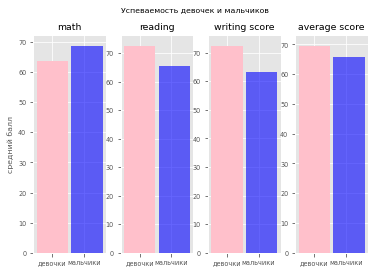

In [16]:
plt5 = plt.figure()
plt5n = plt5.add_subplot(1, 4, 1)
plt5n.bar(1, genderdataframe_mean.at['female', 'math score'], 0.5, color='pink', alpha=1)
plt5n.bar(1 + 0.55, genderdataframe_mean.at['male', 'math score'], 0.5, color='b', alpha=0.6)
plt.xticks([1, 1.5], ['девочки', 'мальчики'])
plt5n.set(title='math', xlabel='', ylabel='средний балл')

plt5n1 = plt5.add_subplot(1, 4, 2)
plt5n1.bar(1, genderdataframe_mean.at['female', 'reading score'], 0.5, color='pink', alpha=1)
plt5n1.bar(1 + 0.55, genderdataframe_mean.at['male', 'reading score'], 0.5, color='b', alpha=0.6)
plt.xticks([1, 1.5], ['девочки', 'мальчики'])
plt5n1.set(title='reading', xlabel='', ylabel='')

plt5n2 = plt5.add_subplot(1, 4, 3)
plt5n2.bar(1, genderdataframe_mean.at['female', 'writing score'], 0.5, color='pink', alpha=1)
plt5n2.bar(1 + 0.55, genderdataframe_mean.at['male', 'writing score'], 0.5, color='b', alpha=0.6)
plt.xticks([1, 1.5], ['девочки', 'мальчики'])
plt5n2.set(title='writing score', xlabel='', ylabel='')

plt5n2 = plt5.add_subplot(1, 4, 4)
plt5n2.bar(1, genderdataframe_mean.at['female', 'average score'], 0.5, color='pink', alpha=1)
plt5n2.bar(1 + 0.55, genderdataframe_mean.at['male', 'average score'], 0.5, color='b', alpha=0.6)
plt.xticks([1, 1.5], ['девочки', 'мальчики'])
plt5n2.set(title='average score', xlabel='', ylabel='')
plt5.suptitle('Успеваемость девочек и мальчиков')
plt.show()


In [17]:
se = np.sqrt((genderdataframe_var.loc[['female'], ['average score']]/valuegirl).at['female', 'average score'] +
             (genderdataframe_var.loc[['male'], ['average score']]/valueboy).at['male', 'average score'])

tt = (genderdataframe_mean.loc[['female'], ['average score']].at['female', 'average score'] -
      genderdataframe_mean.loc[['male'], ['average score']].at['male', 'average score'])/se
if tt > 1.645:
    print('Гипотеза о том что средний балл у девочек выше, чем у мальчиков, не отвергается')
else:
    print('Гипотеза отвергается')

Гипотеза о том что средний балл у девочек выше, чем у мальчиков, не отвергается


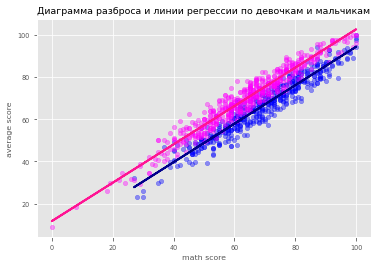

Как можно видеть по графику, при одном и том же общем среднем балле балл по математике у девочек меньше, чем у мальчиков


In [18]:
plt.scatter(dataFirst5['math score'][dataFirst5['gender'] == 'male'],
            dataFirst5['average score'][dataFirst5['gender'] == 'male'],
            color='b', label='male', alpha=0.4, s=20)
plt.scatter(dataFirst5['math score'][dataFirst5['gender'] == 'female'],
            dataFirst5['average score'][dataFirst5['gender'] == 'female'],
            color='magenta', label='female', alpha=0.4, s=20)
male_fit = np.polyfit(dataFirst5['math score'][dataFirst5['gender'] == 'male'],
                      dataFirst5['average score'][dataFirst5['gender'] == 'male'], 1)
female_fit = np.polyfit(dataFirst5['math score'][dataFirst5['gender'] == 'female'],
                        dataFirst5['average score'][dataFirst5['gender'] == 'female'], 1)

plt.plot(dataFirst5['math score'][dataFirst5['gender'] == 'male'],
         male_fit[0] * dataFirst5['math score'][dataFirst5['gender'] == 'male']
         + male_fit[1], color='darkblue', linewidth=2)

plt.plot(dataFirst5['math score'][dataFirst5['gender'] == 'female'],
         female_fit[0] * dataFirst5['math score'][dataFirst5['gender'] == 'female']
         + female_fit[1], color='deeppink', linewidth=2)
plt.xlabel('math score')
plt.ylabel('average score')
plt.title('Диаграмма разброса и линии регрессии по девочкам и мальчикам')
plt.show()
print('Как можно видеть по графику, при одном и том же общем среднем балле балл по математике у девочек меньше, '
      'чем у мальчиков')


## Средний балл с подготовительными курсами и без (Алимурадова)

In [19]:
dataFirst5 = pd.DataFrame(dataFirst.sort_values(by='test preparation course'), copy=False)
dataFirst5['test preparation course'] = dataFirst5['test preparation course'].replace(['none', 'completed'], [0, 1])
font = {'size': 4.5}
plt.rc('font', **font)

def preparation(data, sub):
    data[sub + ' sc+pre'] = np.NaN
    data[sub + ' sc-pre'] = np.NaN
    scorewtprep = data[sub+' score'][(data['test preparation course'] == 1) & 
                                     (data['race/ethnicity'] == 'group A')].mean()
    scorewtoutprep = data[sub+' score'][(data['test preparation course'] == 0) &
                                        (data['race/ethnicity'] == 'group A')].mean()
    scorewtprep1 = data[sub + ' score'][
        (data['test preparation course'] == 1) & (data['race/ethnicity'] == 'group B')].mean()
    scorewtoutprep1 = data[sub + ' score'][
        (data['test preparation course'] == 0) & (data['race/ethnicity'] == 'group B')].mean()

    scorewtprep2 = data[sub + ' score'][
        (data['test preparation course'] == 1) & (data['race/ethnicity'] == 'group C')].mean()
    scorewtoutprep2 = data[sub + ' score'][
        (data['test preparation course'] == 0) & (data['race/ethnicity'] == 'group C')].mean()

    scorewtprep3 = data[sub + ' score'][
        (data['test preparation course'] == 1) & (data['race/ethnicity'] == 'group D')].mean()
    scorewtoutprep3 = data[sub + ' score'][
        (data['test preparation course'] == 0) & (data['race/ethnicity'] == 'group D')].mean()

    scorewtprep4 = data[sub + ' score'][
        (data['test preparation course'] == 1) & (data['race/ethnicity'] == 'group E')].mean()
    scorewtoutprep4 = data[sub + ' score'][
        (data['test preparation course'] == 0) & (data['race/ethnicity'] == 'group E')].mean()
    data[sub + ' sc+pre'][(data['test preparation course'] == 1) &
                          (data['race/ethnicity'] == 'group A')] = scorewtprep
    data[sub + ' sc-pre'][(data['test preparation course'] == 0) &
                          (data['race/ethnicity'] == 'group A')] = scorewtoutprep
    data[sub + ' sc+pre'][(data['test preparation course'] == 1) & 
                          (data['race/ethnicity'] == 'group B')] = scorewtprep1
    data[sub + ' sc-pre'][(data['test preparation course'] == 0) &
                          (data['race/ethnicity'] == 'group B')] = scorewtoutprep1
    data[sub + ' sc+pre'][(data['test preparation course'] == 1) &
                          (data['race/ethnicity'] == 'group C')] = scorewtprep2
    data[sub + ' sc-pre'][(data['test preparation course'] == 0) &
                          (data['race/ethnicity'] == 'group C')] = scorewtoutprep2
    data[sub + ' sc+pre'][(data['test preparation course'] == 1) & 
                          (data['race/ethnicity'] == 'group D')] = scorewtprep3
    data[sub + ' sc-pre'][(data['test preparation course'] == 0) & 
                          (data['race/ethnicity'] == 'group D')] = scorewtoutprep3
    data[sub + ' sc+pre'][(data['test preparation course'] == 1) & 
                          (data['race/ethnicity'] == 'group E')] = scorewtprep4
    data[sub + ' sc-pre'][(data['test preparation course'] == 0) & 
                          (data['race/ethnicity'] == 'group E')] = scorewtoutprep4


preparation(dataFirst5, 'math')
preparation(dataFirst5, 'reading')
preparation(dataFirst5, 'writing')
pd.set_option("display.max_rows", None, "display.max_columns", None)

dataFirst5 = (dataFirst5.drop(columns=['test preparation course'])).groupby('race/ethnicity').mean().round()
dataFirst5


,math score,reading score,writing score,average score,math sc+pre,math sc-pre,reading sc+pre,reading sc-pre,writing sc+pre,writing sc-pre
race/ethnicity,,,,,,,,,,
group A,62.0,65.0,63.0,63.0,68.0,58.0,71.0,61.0,71.0,58.0
group B,63.0,67.0,66.0,65.0,67.0,61.0,73.0,64.0,72.0,62.0
group C,64.0,69.0,68.0,67.0,67.0,63.0,74.0,66.0,74.0,64.0
group D,67.0,70.0,70.0,69.0,70.0,66.0,74.0,68.0,77.0,67.0
group E,74.0,73.0,71.0,73.0,77.0,71.0,77.0,70.0,76.0,68.0


In [20]:
dataFirst7 = dataFirst[['lunch', 'test preparation course']]
dataFirst7['lunch'] = dataFirst7['lunch'].replace(['standard', 'free/reduced'], [1, 0])
dataFirst7['test preparation course'] = dataFirst7['test preparation course'].replace(['completed', 'none'], [1, 0])
dataFirst7

,lunch,test preparation course
0,1,0
1,1,1
2,1,0
3,0,0
4,1,0
5,1,0
6,1,1
7,0,0
8,0,1
9,0,0


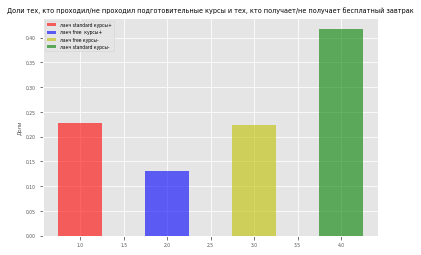

In [21]:
lunch_pr = len(dataFirst7.query('`test preparation course`==1 and lunch == 1'))/len(dataFirst7)
nolunch_pr = len(dataFirst7.query('`test preparation course`==1 and lunch == 0'))/len(dataFirst7)
nolunch_nopr = len(dataFirst7.query('`test preparation course`==0 and lunch == 0'))/len(dataFirst7)
lunch_nopr = len(dataFirst7.query('`test preparation course`==0 and lunch == 1'))/len(dataFirst7)


plt.bar(1, lunch_pr, 0.5, color='r', alpha=0.6, label='ланч standard курсы+')
plt.bar(2, nolunch_pr, 0.5, color='b', alpha=0.6, label='ланч free  курсы+')
plt.bar(3, nolunch_nopr, 0.5, color='y', alpha=0.6, label='ланч free курсы-')
plt.bar(4, lunch_nopr, 0.5, color='g', alpha=0.6, label='ланч standard курсы-')
plt.title('Доли тех, кто проходил/не проходил подготовительные курсы и тех, кто получает/не получает бесплатный завтрак')
plt.legend()
plt.ylabel('Доли')
plt.show()


  Если есть подготовительный курс, то с большой вероятностью ребенок питается платно, а если семья не может позволить себе платить за ланч, то не может позволить и прохождение курсов. Еда является более базовой потребностью, нежели чем курсы.

## Влияние подготовительных курсов на средний балл (Алимурадова)

In [22]:
def preparation2(data, sub):
    data[sub + ' sc+pre'] = np.NaN
    data[sub + ' sc-pre'] = np.NaN
    scorewtprep = data[sub + ' score'][(data['test preparation course'] == 1)].mean()
    scorewtoutprep = data[sub + ' score'][(data['test preparation course'] == 0)].mean()
    data[sub + ' sc+pre'][(data['test preparation course'] == 1)] = scorewtprep
    data[sub + ' sc-pre'][(data['test preparation course'] == 0)] = scorewtoutprep


dataFirst9 = pd.DataFrame(dataFirst)
dataFirst9['test preparation coursee']=dataFirst9['test preparation course'].astype(object)
dataFirst9['test preparation course'] = dataFirst9['test preparation course'].replace(["none", 'completed'], [0, 1])
preparation2(dataFirst9, 'math')
preparation2(dataFirst9, 'reading')
preparation2(dataFirst9, 'writing')

gooddate = dataFirst9.mean().loc[['math sc+pre', 'math sc-pre', 'reading sc+pre', 'reading sc-pre',
                                  'writing sc+pre', 'writing sc-pre']]
gooddate

math sc+pre       69.695531
math sc-pre       64.077882
reading sc+pre    73.893855
reading sc-pre    66.534268
writing sc+pre    74.418994
writing sc-pre    64.504673
dtype: float64

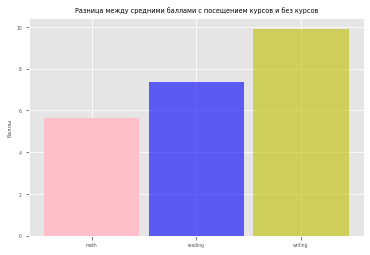

In [23]:
plt.bar(1, gooddate.at['math sc+pre'] - gooddate.at['math sc-pre'], 0.5, color='pink', alpha=1)
plt.bar(1 + 0.55, gooddate.at['reading sc+pre'] - gooddate.at['reading sc-pre'], 0.5, color='b', alpha=0.6)
plt.bar(1 + 1.1, gooddate.at['writing sc+pre'] - gooddate.at['writing sc-pre'], 0.5, color='y', alpha=0.6)
plt.xticks([1, 1.55, 2.1], ['math', 'reading', 'writing'])
plt.ylabel('Баллы')
plt.title("Разница между средними баллами с посещением курсов и без курсов")
plt.show()

**ВЫВОД:** Сильнее всего подготовительные курсы помогают в writing,  и в меньшей степени в math

## Доля тех, кто питается бесплатно и платно (Алимурадова)

In [24]:
dataFirst12 = pd.DataFrame(dataFirst)
dataFirst12['lunch'] = dataFirst12['lunch'].replace(['standard', 'free/reduced'], [1, 0])
lunchpl = len(dataFirst12['lunch'][dataFirst12['lunch'] == 1])
lunchmin = len(dataFirst12['lunch'][dataFirst12['lunch'] == 0])
ty = lunchpl/(lunchmin+lunchpl)
datalunchframe = pd.DataFrame([{'доля платного ланча': ty, 'доля бесплатного ланча':1 - ty}])
datalunchframe

,доля платного ланча,доля бесплатного ланча
0,0.645,0.355


**ВЫВОД:** большая часть детей из выборки платит за ланч, однако, согласно статическим данным, около 60% американских школьников питаются бесплатно. 